<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/Paradigmas_Centroides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#plt.reParams('figure.figsize') = (12, 6)

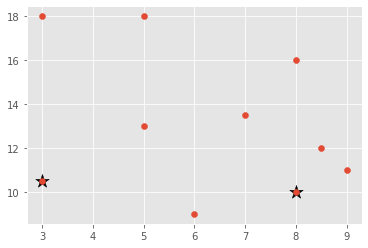

In [2]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8, 10], [3, 10.5]])
plt.scatter(C[0][0], C[0][1], marker = '*', s=200, c = 'k')
plt.scatter(C[1][0], C[1][1], marker = '*', s=200, c = 'k')
plt.scatter(data[:,0], data[:, 1])

In [3]:
distances = []
clusters = np.zeros(len(data))

def dist(a, b, ax=1):
  return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
  distance = dist(data[i], C)
  distances.append(distance)
  cluster = np.argmin(distance)
  clusters[i] = cluster

print(clusters)

distances

[0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

In [4]:
for i in range(len(C)):
  points = [data[j] for j in range(len(data)) if clusters[j] == i]
  print(points)
  C[i] = np.mean(points, axis =0)
C

[array([ 8., 10.]), array([ 7. , 13.5]), array([6., 9.]), array([ 9., 11.]), array([ 8.5, 12. ]), array([ 8., 16.])]
[array([ 3. , 10.5]), array([ 5., 18.]), array([ 5., 13.]), array([ 3., 18.])]


array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

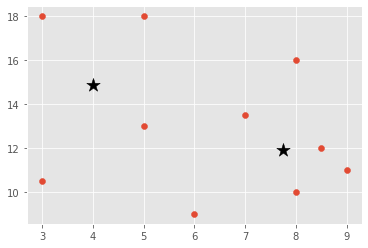

In [5]:
plt.scatter(C[0][0], C[0][1], marker = '*', s=200, c = 'k')
plt.scatter(C[1][0], C[1][1], marker = '*', s=200, c = 'k')
plt.scatter(data[:,0], data[:, 1])

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

In [8]:
data = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/xclara.csv')

print(data.shape)
data.head(5)

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


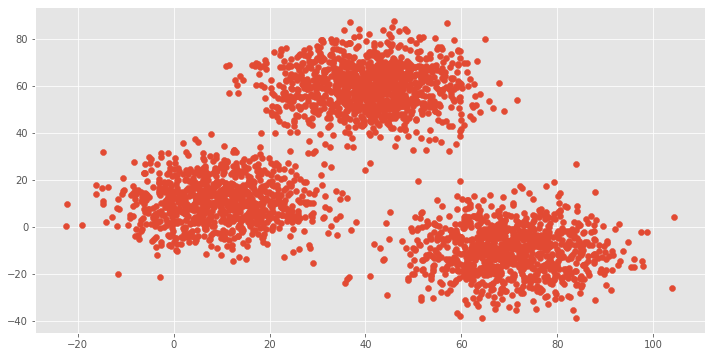

In [11]:
x1 = data.V1.values
x2 = data.V2.values
X = np.array(list(zip(x1, x2)))
plt.scatter(x1, x2)

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
# La mayoria de las veces lo que se hace para determinar un hiperparámetroes jugar
# En este caso elegimos dos 
km = km.fit(X)
y_hat = km.predict(X)
C = km.cluster_centers_

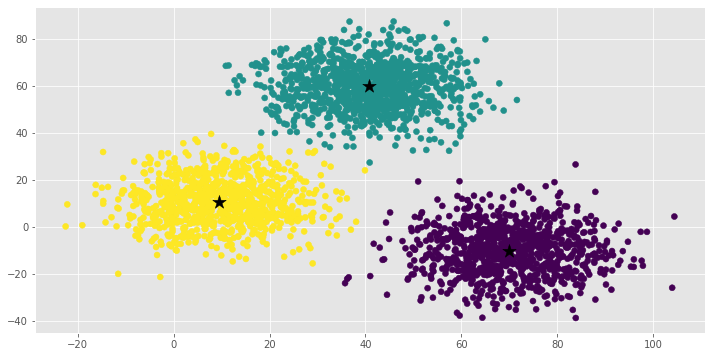

In [16]:
fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c = y_hat)
ax.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')

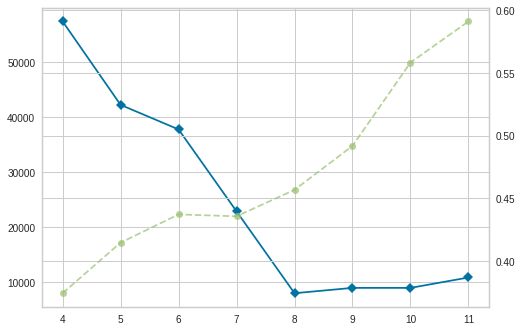

In [18]:
# ¿Como elegir un valor para k? ==> Gráfica de codo.
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

X, y = make_blobs(n_samples = 1000, n_features = 1000, centers = 8, random_state = 42)

vis = KElbowVisualizer(KMeans(), k = (4,12))
vis.fit(X)
plt.show()

# Liena azul el numero de grupos que esta usando
# Linea verde que tanto tardo en ejecutarse

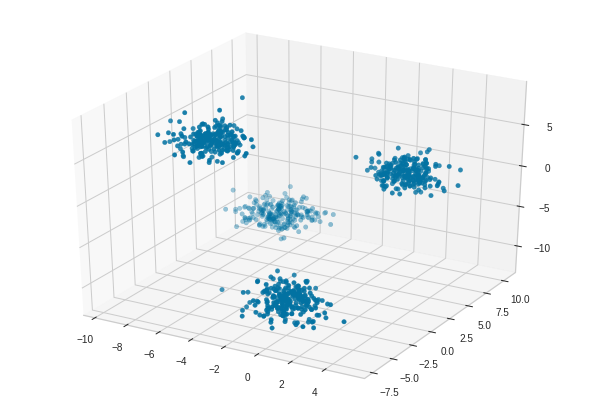

In [21]:
from mpl_toolkits.mplot3d import Axes3D

X, y = make_blobs(n_samples = 900, n_features = 3, centers = 4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2])

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
y_hat = kmeans.predict(X)
C = kmeans.cluster_centers_

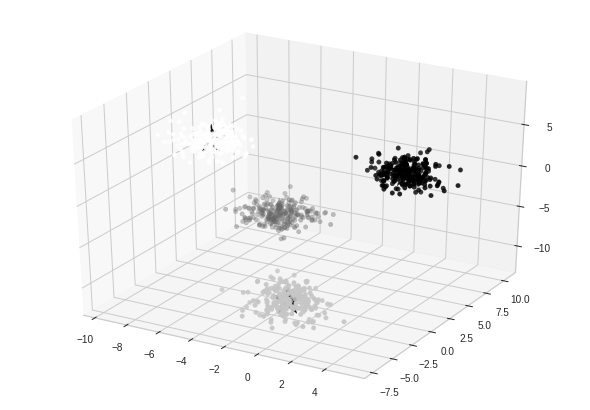

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = y_hat)
ax.scatter(C[:,0], C[:,1], C[:,2], marker = '*', c = 'k', s = 1000)

In [24]:
import cv2


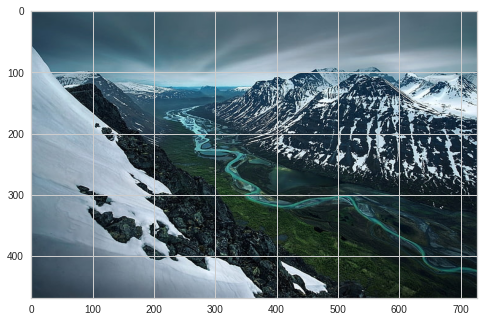

(468, 728, 3)

In [32]:
img_orig = cv2.imread('/content/suecia.jpeg')
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

In [33]:
vect = img.reshape((-1, 3))
vect = np.float32(vect)
criteria = (cv2.TermCriteria_MAX_ITER, 10, 1.0)
K = 5

attemps = 10
ret, label, center=cv2.kmeans(vect, K, None, criteria, attemps, cv2.KMEANS_PP_CENTERS)

In [34]:
center = np.uint8(center)
res = center[label.flatten()]
img_res = res.reshape((img.shape))

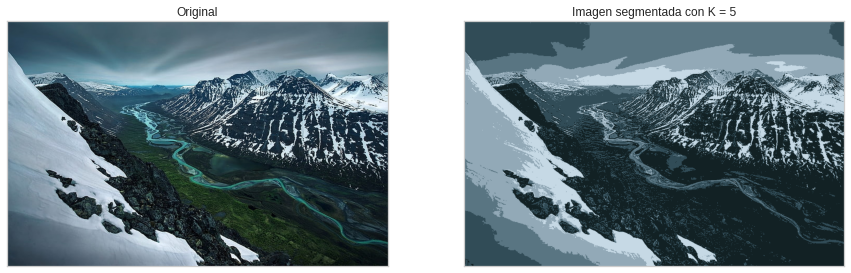

In [35]:
figure_size = 15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_res)
plt.title('Imagen segmentada con K = %i'%K), plt.xticks([]), plt.yticks([])
plt.show()

Referencias:

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb